In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LassoCV, RidgeCV

In [5]:
pip install lazypredict

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
from scipy import stats
from scipy.stats import norm, skew # for some statistics
import warnings # to ignore warning
from sklearn.preprocessing import RobustScaler, PowerTransformer, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [7]:
## Melakukan read data, baik datatrain dan datatest
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [8]:
#Menggabungkan datatest dan datatrain
datagab = pd.concat([data_train,data_test],axis=0)
datagab.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.00
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.00
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.00
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.00
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.00


## Exploratory Data Analysis

#### Cek Struktur Data

In [9]:
#Cek Shape data
data_train.shape

(1460, 81)

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
train_dtype = data_train.dtypes
train_dtype.value_counts()

object     43
int64      35
float64     3
dtype: int64

#### Pengecekan Missing Value

In [12]:
data_train.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

Ternyata terdapat beberapa missing value di beberapa variabel

In [13]:
#Pengecekan statistika deskriptif untuk datatrain
data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


In [14]:
#Pengecekan statdes untuk data kategorik
data_train.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


## Visualisasi

In [66]:
px.histogram(data_train, x='SalePrice', title='Distribusi Sales Price')

Dari grafik di atas, dapat diketahui bahwa Saleprice banyak berada di sekitar 130k sampai 150k.

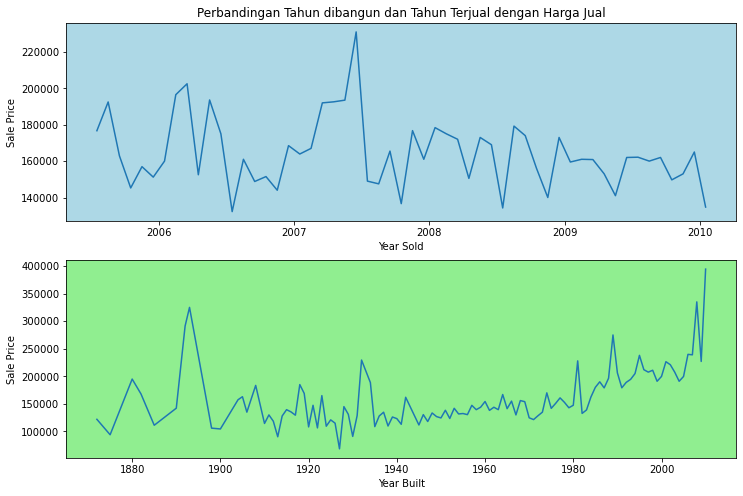

In [16]:
xdmd = data_train.groupby(['YrSold', 'MoSold'], as_index=False)['SalePrice'].median()
xdmdb = data_train.groupby('YearBuilt')['SalePrice'].median()
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
axes[0].set_facecolor('lightblue')  
axes[1].set_facecolor('lightgreen')  
axes[0].set_title('Perbandingan Tahun dibangun dan Tahun Terjual dengan Harga Jual')
axes[0].plot(xdmd.index, xdmd.SalePrice)
axes[0].set_xlabel('Year Sold')
axes[0].set_ylabel('Sale Price')
axes[0].set_xticks([5.5, 17.5, 29.5, 41.5, 53.5])
axes[0].set_xticklabels([2006, 2007, 2008, 2009, 2010])
axes[1].plot(xdmdb.index, xdmdb)
axes[1].set_xlabel('Year Built')
axes[1].set_ylabel('Sale Price')

plt.show()

Harga penjualan terlihat meningkat dari akhir tahun 2006 hingga akhir tahun 2007 dengan lonjakan pada Desember 2022. Kemudian terjadi penurunan tiba-tiba pada Januari 2008 dan tidak menunjukkan banyak variasi dalam harga setelahnya.

Setelah tahun 1925, harga penjualan tampaknya berbanding lurus dengan tahun pembangunan rumah, yaitu rumah-rumah tua dijual dengan harga lebih rendah daripada rumah-rumah baru. 
Alasan di balik hal ini mungkin adalah kondisi rumah yang memburuk seiring berjalannya waktu.

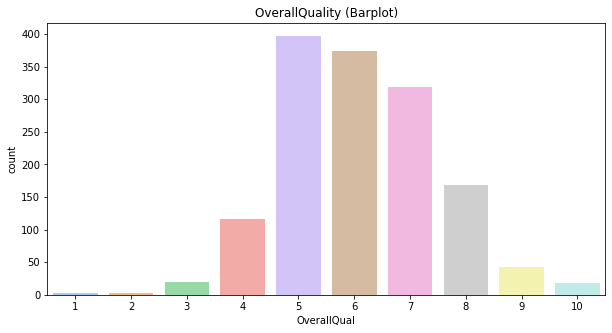

In [18]:
fig, axes = plt.subplots(figsize=(10, 5))
axes.set_facecolor('white')
axes.set_title('OverallQuality (Barplot)')
sns.countplot(x=data_train['OverallQual'], ax=axes, palette='pastel')
plt.show()

Harga jual meningkat seiring dengan kualitas keseluruhan, yang tidak mengherankan. Namun, sebagian besar rumah yang dijual memiliki kondisi keseluruhan yang rata-rata (5-6).

In [19]:
xdf=data_train.groupby(['Street','Alley','MSZoning','Neighborhood'], as_index=False, dropna=False)['Id'].count()
xdf.fillna('NA', inplace=True)
xdf.rename(columns={'Id':'Number of Houses'}, inplace=True)
px.sunburst(xdf,path=['Street','Alley','MSZoning','Neighborhood'], values='Number of Houses', color='Number of Houses')

Di atas, sunburst diagram mengklasifikasikan jumlah rumah berdasarkan Street, Alley, MSZoning, dan Neighbourhood. Dari data tersebut, kita dapat menarik dua kesimpulan utama:

1. Hampir semua jalan di area tersebut beraspal (Paved) (hanya enam yang berupa Gravel).
2. Mayoritas rumah tidak memiliki akses gang (ditunjukkan oleh NA).

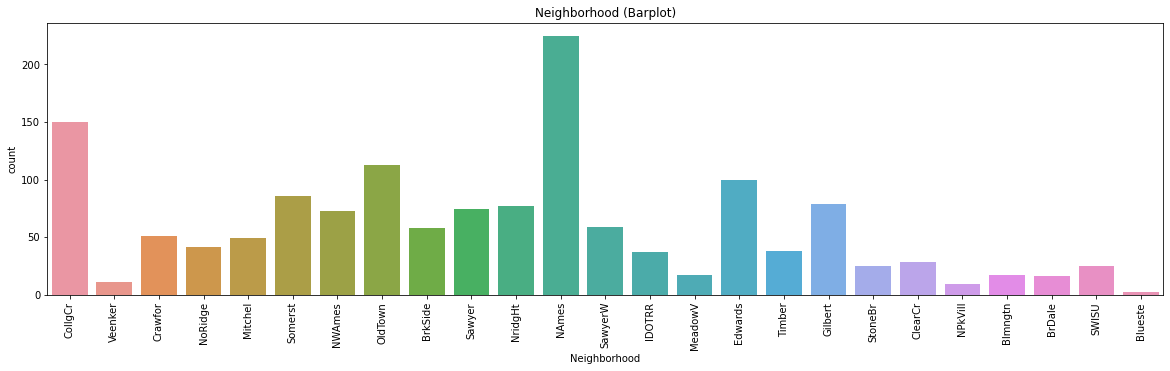

In [20]:
fig, axes = plt.subplots(figsize=(20, 5))
axes.set_title('Neighborhood (Barplot)')
sns.countplot(x=data_train['Neighborhood'], ax=axes)
axes.set_xticklabels(labels=data_train['Neighborhood'].unique().tolist(), rotation=90)

plt.show()

Rumah-rumah dari lingkungan NridgHt (Northridge Heights) dan StoneBr (Stone Brook) menunjukkan variasi yang besar dalam SalePrice. SalePrice berada di lingkungan NoRidge (Northridge). Namun, jumlah rumah yang terjual paling banyak ada di lingkungan NAmes (North Ames) diikuti oleh CollgCr (College Creek), dan jumlah rumah yang paling sedikit terjual ada di Blueste (Bluestem) diikuti oleh NPkVill (Northpark Villa). Anda mungkin menyadari bahwa harga jual dari lingkungan NAmes tidak bervariasi banyak dan berada di bawah rata-rata, yang bisa menjadi alasan mengapa mereka termasuk di antara rumah yang paling banyak terjual.

In [21]:
data_test.shape

(1459, 80)

## Membuat Prediksi

In [22]:

Numeric_Attributes = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
log_numeric_cols = Numeric_Attributes.copy()
data_train[log_numeric_cols] = np.log(data_train[log_numeric_cols] + 1)

In [23]:
log_numeric_cols=Numeric_Attributes.copy()
data_train[log_numeric_cols]=np.log(data_train[log_numeric_cols]+1)

In [24]:
data_train[log_numeric_cols].head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.65,2.31,1.12,1.03,2.15,2.15,1.84,2.02,0.00,1.79,...,1.99,0.00,1.63,0.00,0.00,0.00,0.00,0.00,0.74,2.15
1,1.69,2.32,1.08,1.16,2.15,2.15,0.00,2.07,0.00,1.89,...,1.96,1.90,0.00,0.00,0.00,0.00,0.00,0.00,1.03,2.15
2,1.66,2.33,1.12,1.03,2.15,2.15,1.81,1.97,0.00,1.96,...,2.00,0.00,1.56,0.00,0.00,0.00,0.00,0.00,1.19,2.15
3,1.63,2.32,1.12,1.03,2.15,2.15,0.00,1.85,0.00,1.99,...,2.01,0.00,1.52,1.89,0.00,0.00,0.00,0.00,0.74,2.15
4,1.69,2.36,1.16,1.03,2.15,2.15,1.93,2.01,0.00,1.97,...,2.05,1.83,1.69,0.00,0.00,0.00,0.00,0.00,1.27,2.15


In [25]:
input_cols = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']
target_col = 'SalePrice'

In [26]:
inputs_df = data_train[input_cols].copy()

In [27]:
targets = data_train[target_col]

In [28]:
numeric_cols = inputs_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = inputs_df.select_dtypes('object').columns.tolist()
data_train[numeric_cols].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,1.65,2.31,1.12,1.03,2.15,2.15,1.84,2.02,0.00,...,1.99,0.00,1.63,0.00,0.00,0.00,0.00,0.00,0.74,2.15
1,20,1.69,2.32,1.08,1.16,2.15,2.15,0.00,2.07,0.00,...,1.96,1.90,0.00,0.00,0.00,0.00,0.00,0.00,1.03,2.15
2,60,1.66,2.33,1.12,1.03,2.15,2.15,1.81,1.97,0.00,...,2.00,0.00,1.56,0.00,0.00,0.00,0.00,0.00,1.19,2.15
3,70,1.63,2.32,1.12,1.03,2.15,2.15,0.00,1.85,0.00,...,2.01,0.00,1.52,1.89,0.00,0.00,0.00,0.00,0.74,2.15
4,60,1.69,2.36,1.16,1.03,2.15,2.15,1.93,2.01,0.00,...,2.05,1.83,1.69,0.00,0.00,0.00,0.00,0.00,1.27,2.15


In [29]:
#Input Data Numerik
missing_counts = inputs_df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

Terdapat beberapa teknik untuk mengisi nilai yang hilang, namun kita akan menggunakan teknik yang paling dasar: menggantikan nilai yang hilang dengan nilai rata-rata di kolom menggunakan kelas SimpleImputer dari modul sklearn.impute.

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
imputer = SimpleImputer(strategy = 'median')

In [32]:
imputer.fit(data_train[numeric_cols])

SimpleImputer(strategy='median')

In [33]:
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])

In [34]:
missing_counts = inputs_df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

Series([], dtype: int64)

Missing value sudah teratasi

In [35]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
min,20.00,1.41,2.10,0.53,0.53,2.14,2.15,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.53,2.15
max,190.00,1.91,2.59,1.22,1.19,2.15,2.15,2.13,2.27,2.12,...,2.11,2.05,1.99,1.99,1.98,1.97,2.03,2.37,1.27,2.15


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_train[numeric_cols])

MinMaxScaler()

In [37]:
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

In [38]:
#Dilakukan transformasi nilai variabel menjadi skala 0 sampai 1
inputs_df[numeric_cols].describe().loc[['min', 'max']]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Sudah dilakukan transformasi

In [39]:
#Pengecekan dataset 
inputs_df[categorical_cols].nunique().sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
BsmtFinType2      6
Heating           6
RoofStyle         6
SaleCondition     6
BsmtFinType1      6
GarageType        6
Foundation        6
Electrical        5
FireplaceQu       5
HeatingQC         5
GarageQual        5
GarageCond        5
MSZoning          5
LotConfig         5
ExterCond         5
BldgType          5
BsmtExposure      4
MiscFeature       4
Fence             4
LotShape          4
LandContour       4
BsmtCond          4
KitchenQual       4
MasVnrType        4
ExterQual         4
BsmtQual          4
LandSlope         3
GarageFinish      3
PavedDrive        3
PoolQC            3
Utilities         2
CentralAir        2
Street            2
Alley             2
dtype: int64

Ternyata ukuran kategorikal datanya banyak yang berbeda

Karena model machine learning hanya dapat dilatih dengan data numerik, kita perlu mengonversi data kategorikal menjadi angka. Teknik umum yang digunakan adalah menggunakan one-hot encoding untuk kolom kategorikal. One-hot encoding melibatkan penambahan kolom biner baru (0/1) untuk setiap kategori unik dari suatu kolom kategorikal.

In [40]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(data_train[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(len(encoded_cols))
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

268


In [41]:
inputs_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.24,RL,0.48,0.42,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0.00,RL,0.55,0.45,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
2,0.24,RL,0.49,0.48,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
3,0.29,RL,0.44,0.45,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
4,0.24,RL,0.57,0.53,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00


In [42]:
inputs_df[numeric_cols + encoded_cols].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.24,0.48,0.42,0.86,0.75,0.95,0.89,0.86,0.89,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0.00,0.55,0.45,0.80,0.95,0.76,0.44,0.00,0.91,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
2,0.24,0.49,0.48,0.86,0.75,0.94,0.87,0.85,0.87,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
3,0.29,0.44,0.45,0.86,0.75,0.32,0.34,0.00,0.82,0.00,...,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
4,0.24,0.57,0.53,0.91,0.75,0.93,0.84,0.91,0.89,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00


In [43]:
log_targets = np.log(targets)

In [44]:
cek_df = pd.get_dummies(datagab).reset_index(drop=True)


In [46]:
new_train_data = datagab.iloc[:len(data_train), :]
new_test_data = datagab.iloc[len(data_train):, :]
X_train = new_train_data.drop('SalePrice', axis=1)
y_train = np.log1p(new_train_data['SalePrice'].values.ravel())
X_test = new_test_data.drop('SalePrice', axis=1)

In [47]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
numeric_features = ['numeric_column_1', 'numeric_column_2', ...]  
categorical_features = ['categorical_column_1', 'categorical_column_2', ...]  
numeric_transformer = RobustScaler()
categorical_transformer = OneHotEncoder()

preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
pipeline = make_pipeline(preprocessing_pipeline, RobustScaler())



In [61]:
x_train1,x_test1,y_train1,y_test1=train_test_split(X_train,y_train,test_size=0.25)

reg= LazyRegressor(verbose=0,ignore_warnings=True,custom_metric=None)
train,test=reg.fit(x_train1,x_test1,y_train1,y_test1)
test
     

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [10:00<00:00, 14.31s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3404
[LightGBM] [Info] Number of data points in the train set: 1095, number of used features: 160
[LightGBM] [Info] Start training from score 12.023527


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


Digunakan ridge dan Gradient Boosting Regressor karena keduanya merupakan model yang cukup baik.

In [59]:
from sklearn.model_selection import train_test_split
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs_df[numeric_cols + encoded_cols], 
                                                                        log_targets, 
                                                                        test_size=0.25, 
                                                                        random_state=42)

In [50]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

# Membuat instance model
model1 = Ridge()
model2 = GradientBoostingRegressor()

In [51]:
model1.fit(train_inputs, train_targets)
model2.fit(train_inputs, train_targets)

GradientBoostingRegressor()

In [52]:
# Membuat fungsi RMSE untuk memeriksa akurasi data
from sklearn.metrics import mean_squared_error
def rmse(preds, targets):
    return mean_squared_error(preds, targets, squared = False)

In [53]:
train_preds1 = model1.predict(train_inputs)
train_preds2 = model2.predict(train_inputs)
train_rmse1 = rmse(train_targets, train_preds1)
train_rmse2 = rmse(train_targets, train_preds2)
print('Nilai RMSE untuk Training Set 1 {}.'.format(train_rmse1))
print('Nilai RMSE untuk Training Set 2 {}.'.format(train_rmse2))

Nilai RMSE untuk Training Set 1 0.09686922207439781.
Nilai RMSE untuk Training Set 2 0.07645363900959831.


In [54]:
val_preds1 = model1.predict(val_inputs)
val_preds2 = model2.predict(val_inputs)
val_rmse1 = rmse(val_targets, val_preds1)
val_rmse2 = rmse(val_targets, val_preds2)
print('Nilai RMSE untuk Validation Set 1 {}.'.format(val_rmse1))
print('Nilai RMSE untuk Validation Set 2 {}.'.format(val_rmse2))

Nilai RMSE untuk Validation Set 1 0.12934027111051744.
Nilai RMSE untuk Validation Set 2 0.13061469079944119.


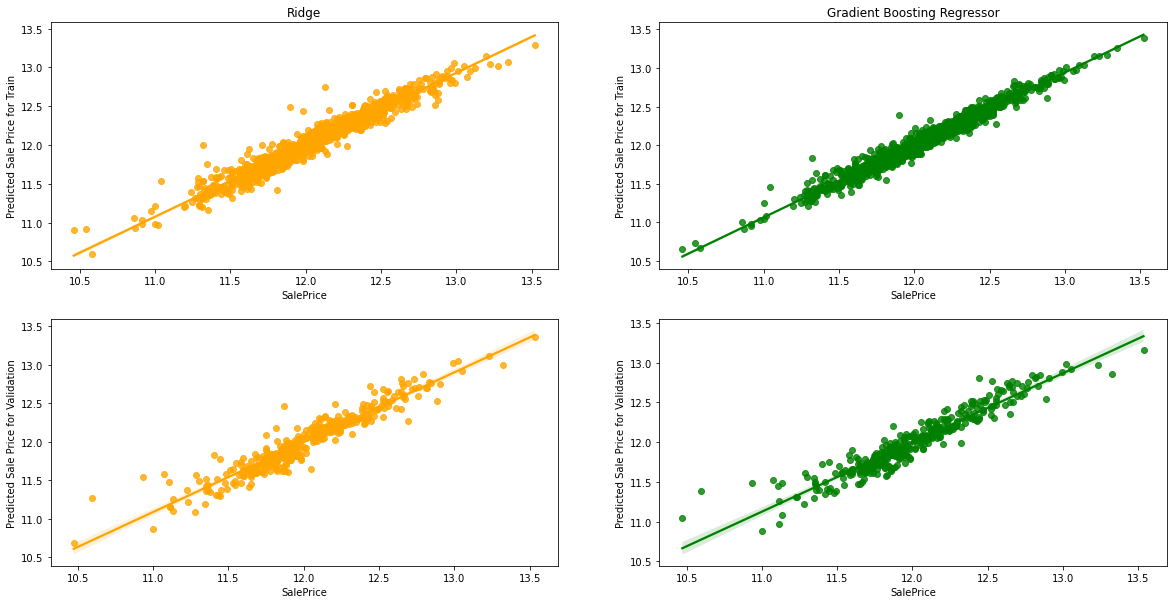

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes[0, 0].set_title('Ridge')
sns.regplot(x=train_targets, y=train_preds1, ax=axes[0, 0], color='orange')
axes[0, 0].set_ylabel('Predicted Sale Price for Train')
axes[0, 1].set_title('Gradient Boosting Regressor')
sns.regplot(x=train_targets, y=train_preds2, ax=axes[0, 1], color='green')
axes[0, 1].set_ylabel('Predicted Sale Price for Train')
sns.regplot(x=val_targets, y=val_preds1, ax=axes[1, 0], color='orange')
axes[1, 0].set_ylabel('Predicted Sale Price for Validation')
sns.regplot(x=val_targets, y=val_preds2, ax=axes[1, 1], color='green')
axes[1, 1].set_ylabel('Predicted Sale Price for Validation')

plt.show()

Prediksi yang diberikan oleh Ridge tampaknya kurang menyimpang dari nilai sebenarnya, namun GradientBoostingRegressor tidak sepenuhnya gagal, ada beberapa titik data yang menyebabkan RMSE sedikit lebih tinggi.

In [ ]:
model=GradientBoostingRegressor(random_state=42)
parameters = {
    'learning_rate':[0.01, 0.1, 0.2],
    'n_estimators':[200,240,260],
    'max_depth':[2,3,4],
    'max_features':[152,163,174]
}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(model,parameters, cv=5)
cv.fit(inputs_df[numeric_cols + encoded_cols],log_targets.values.ravel())
cv.best_params_
model2 =  GradientBoostingRegressor(random_state=42,
                                   learning_rate=cv.best_params_['learning_rate'],
                                   max_depth=cv.best_params_['max_depth'],
                                   n_estimators=cv.best_params_['n_estimators'],
                                   max_features=cv.best_params_['max_features'])
model2.fit(train_inputs, train_targets)
tuned_train_preds2 = model2.predict(train_inputs)
tuned_val_preds2 = model2.predict(val_inputs)
rmse(tuned_train_preds2, train_targets), rmse(tuned_val_preds2, val_targets)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes[0, 0].set_title('Ridge')
sns.regplot(x=val_targets, y=val_preds1, ax=axes[0, 0], color='orange')
axes[0, 0].set_ylabel('Predicted Sale Price (Untuned)')
axes[0, 1].set_title('GradientBoostingRegressor')
sns.regplot(x=val_targets, y=val_preds2, ax=axes[0, 1], color='green')
axes[0, 1].set_ylabel('Predicted Sale Price (Untuned)')
sns.regplot(x=val_targets, y=tuned_val_preds1, ax=axes[1, 0], color='blue')
axes[1, 0].set_ylabel('Predicted Sale Price (Tuned)')
sns.regplot(x=val_targets, y=tuned_val_preds2, ax=axes[1, 1], color='red')
axes[1, 1].set_ylabel('Predicted Sale Price (Tuned)')

plt.show()

Dalam skenario ini, situasinya terlihat lebih baik dan kita juga mendapatkan RMSE yang lebih rendah untuk GradientBoostingRegressor daripada Ridge. Jadi, alih-alih memilih salah satu dari kedua model ini, kita akan menggunakan kedua model tersebut untuk membuat prediksi akhir.

#### Feature Importance

In [ ]:
weights=model1.coef_
weights_df = pd.DataFrame({
    'Feature': train_inputs.columns,
    'Importance': weights
}).sort_values('Importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=weights_df.head(10), x='Importance', y='Feature');
model2.feature_importances_
importance_df = pd.DataFrame({
    'Features': train_inputs.columns,
    'Importance': model2.feature_importances_
}).sort_values('Importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='Importance', y='Features');


#### Membuat Prediksi Akhir

In [ ]:
model1.fit(inputs_df[numeric_cols + encoded_cols], log_targets)
model2.fit(inputs_df[numeric_cols + encoded_cols], log_targets)

In [ ]:
def predict_input(input_df):
    input_df[log_numeric_cols]=np.log(input_df[log_numeric_cols]+1)
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols].values)
    X_input = input_df[numeric_cols + encoded_cols]
    prediction = 0.45*model1.predict(X_input) + 0.55*model2.predict(X_input)
    return np.exp(prediction)

In [ ]:
submission = pd.read_csv('sample_submission')

submission['SalePrice']=predict_input(data_test)
submission.head()